**IMPORT PACKAGES**

In [ ]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns

**IMPORT DATA**

In [ ]:
df=pd.read_csv('/content/global_freelancers_raw.csv')
print("DataFrame reloaded successfully. Now let's look at the null values.")
df.head(10)

DataFrame reloaded successfully. Now let's look at the null values.


,freelancer_ID,name,gender,age,country,language,primary_skill,years_of_experience,hourly_rate (USD),rating,is_active,client_satisfaction
0,FL250001,Ms. Nicole Kidd,f,52.0,Italy,Italian,Blockchain Development,11.0,100,NaN,0,NaN
1,FL250002,Vanessa Garcia,FEMALE,52.0,Australia,English,Mobile Apps,34.0,USD 100,3.3,1,84%
2,FL250003,Juan Nelson,male,53.0,Germany,German,Graphic Design,31.0,50,0.0,N,71%
3,FL250004,Amanda Spencer,F,38.0,Australia,English,Web Development,4.0,$40,1.5,N,90%
4,FL250005,Lynn Curtis DDS,female,53.0,Germany,German,Web Development,27.0,30,4.8,0,83%
5,FL250006,Lisa Johnson,female,59.0,Netherlands,Dutch,AI,14.0,$30,2.4,False,NaN
6,FL250007,Eric Myers,m,52.0,Indonesia,Indonesian,Data Analysis,10.0,USD 75,3.1,0,94%
7,FL250008,Ricky Graham,male,43.0,Italy,Italian,Blockchain Development,14.0,USD 40,4.6,False,94%
8,FL250009,Sean Martin,male,26.0,United States,English,Blockchain Development,4.0,NaN,4.0,True,76%
9,FL250010,Matthew Lloyd,MALE,52.0,Turkey,Turkish,AI,22.0,$50,NaN,1,NaN


**DATASET OVERVIEW**

In [ ]:
#Check dataset information

print("Dataset Information")
df.info()

Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   freelancer_ID        1000 non-null   object 
 1   name                 1000 non-null   object 
 2   gender               1000 non-null   object 
 3   age                  970 non-null    float64
 4   country              1000 non-null   object 
 5   language             1000 non-null   object 
 6   primary_skill        1000 non-null   object 
 7   years_of_experience  949 non-null    float64
 8   hourly_rate (USD)    906 non-null    object 
 9   rating               899 non-null    float64
 10  is_active            911 non-null    object 
 11  client_satisfaction  824 non-null    object 
dtypes: float64(3), object(9)
memory usage: 93.9+ KB


In [ ]:
#Check null values or missing values

print('Number of null values per column:')
df.isnull().sum()

Number of null values per column:


,0
freelancer_ID,0
name,0
gender,0
age,30
country,0
language,0
primary_skill,0
years_of_experience,51
hourly_rate (USD),94
rating,101


In [ ]:
#Check data duplicates

print('Number of duplicates values per column:')
df.duplicated().sum()

Number of duplicates values per column:


np.int64(0)

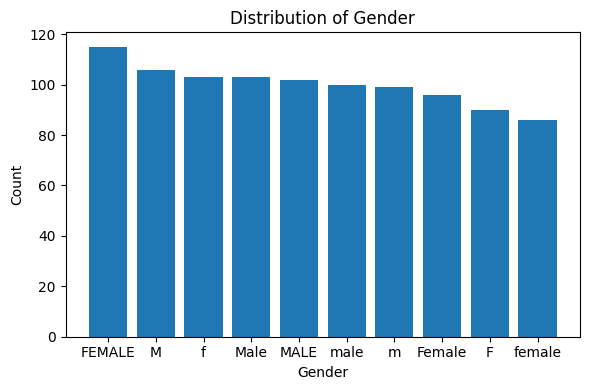

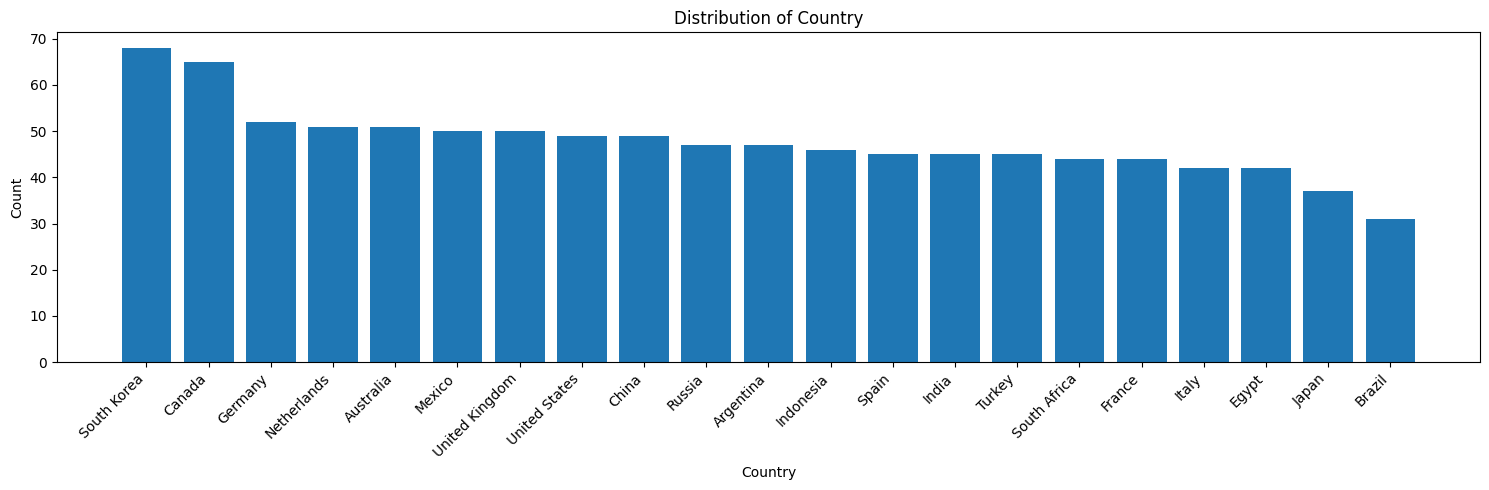

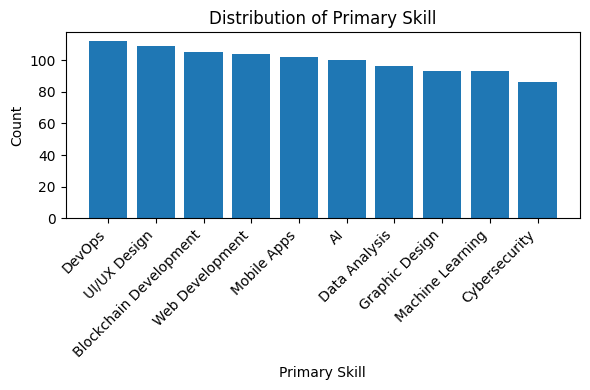

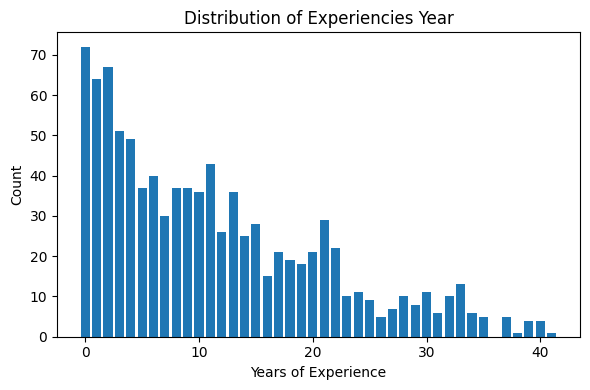

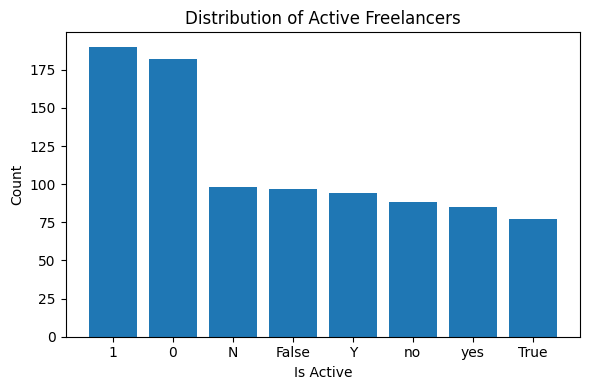

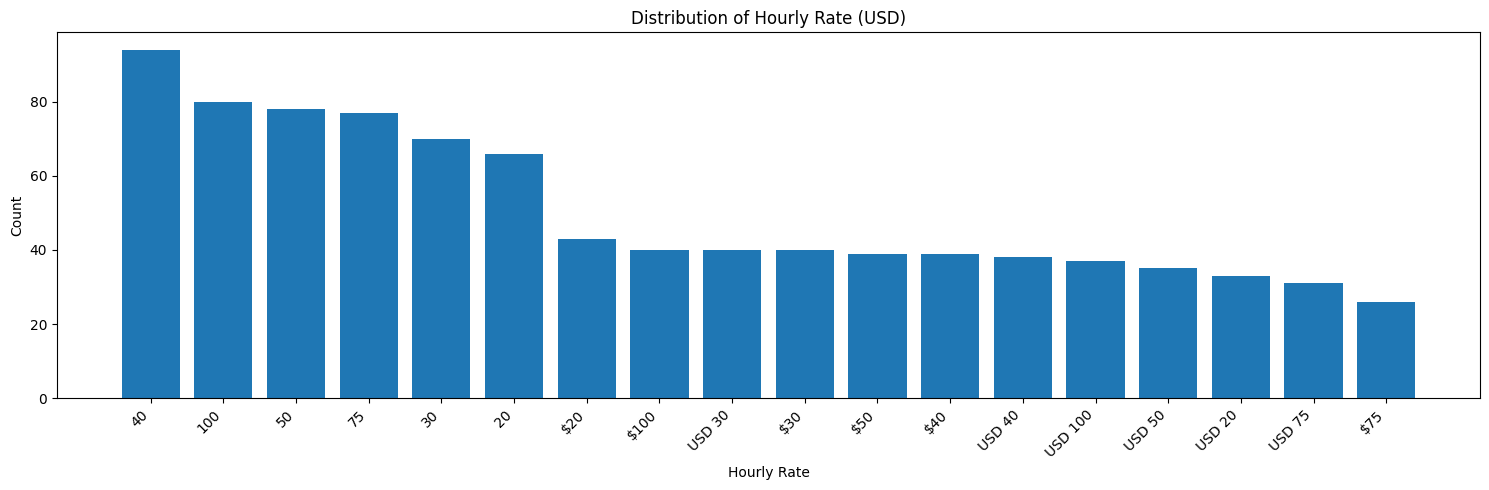

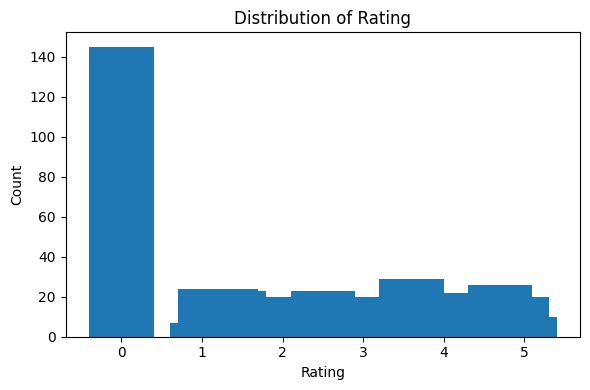

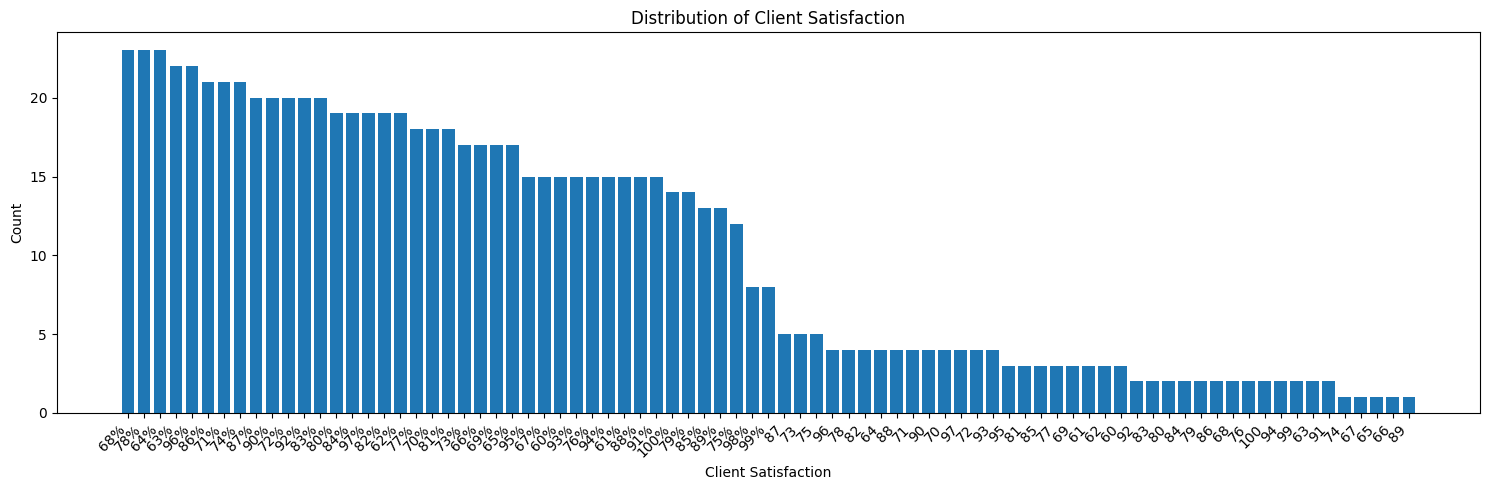

In [ ]:
#Check categories of the columns that looks weird

#Gender
plt.figure(figsize=(6, 4))
gender_counts = df['gender'].value_counts()
plt.bar(x=gender_counts.index, height=gender_counts.values)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()

#Country
plt.figure(figsize=(15, 5))
country_counts = df['country'].value_counts()
plt.bar(x=country_counts.index, height=country_counts.values)
plt.title('Distribution of Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#Primary Skill
plt.figure(figsize=(6, 4))
primaryskill_counts = df['primary_skill'].value_counts()
plt.bar(x=primaryskill_counts.index, height=primaryskill_counts.values)
plt.title('Distribution of Primary Skill')
plt.xlabel('Primary Skill')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#Year of Experience
plt.figure(figsize=(6, 4))
years_counts = df['years_of_experience'].value_counts()
plt.bar(x=years_counts.index, height=years_counts.values) # Corrected 'years.index' to 'years_counts.index'
plt.title('Distribution of Experiencies Year')
plt.xlabel('Years of Experience')
plt.ylabel('Count')
plt.tight_layout()

#Is_active
plt.figure(figsize=(6, 4))
isactive_counts = df['is_active'].value_counts()
plt.bar(x=isactive_counts.index, height=isactive_counts.values)
plt.title('Distribution of Active Freelancers')
plt.xlabel('Is Active')
plt.ylabel('Count')
plt.tight_layout()

#Hourly Rate (USD)
plt.figure(figsize=(15, 5))
hourlyrate_counts = df['hourly_rate (USD)'].value_counts()
plt.bar(x=hourlyrate_counts.index, height=hourlyrate_counts.values)
plt.title('Distribution of Hourly Rate (USD)')
plt.xlabel('Hourly Rate')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#Rating
plt.figure(figsize=(6, 4))
rating_counts = df['rating'].value_counts()
plt.bar(x=rating_counts.index, height=rating_counts.values)
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()

#Client Satisfaction
plt.figure(figsize=(15, 5))
satisfaction_counts = df['client_satisfaction'].value_counts()
plt.bar(x=satisfaction_counts.index, height=satisfaction_counts.values)
plt.title('Distribution of Client Satisfaction')
plt.xlabel('Client Satisfaction')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [ ]:
#Check data in years_of_experience column to make sure it is really weird or not by comparing with the client_satisfaction data

df_less_than_1_year_exp = df[df['years_of_experience'] < 1]
print("Freelancers with less than 1 year of experience:")
display(df_less_than_1_year_exp.head())

Freelancers with less than 1 year of experience:


,freelancer_ID,name,gender,age,country,language,primary_skill,years_of_experience,hourly_rate (USD),rating,is_active,client_satisfaction
15,FL250016,Wyatt Stout,m,42.0,Japan,Japanese,Data Analysis,0.0,$30,1.2,0,69%
25,FL250026,Anna Mccann,FEMALE,22.0,South Korea,Korean,DevOps,0.0,USD 30,1.2,1,70%
41,FL250042,Savannah Williams,Female,21.0,Canada,English,Web Development,0.0,30,2.7,1,84%
50,FL250051,Julie Burgess,FEMALE,23.0,Argentina,Spanish,Cybersecurity,0.0,75,1.9,True,79%
67,FL250068,Vicki Kelly,FEMALE,55.0,Brazil,Portuguese,Web Development,0.0,$40,0.0,True,NaN


**DATA CLEANING, DATA TRANSFORMATION, & DATA MANIPULATION**

In [ ]:
#Standardize the column who has unsame categories

# Standardize the 'gender' column
df['gender'] = df['gender'].replace({
    'FEMALE': 'Female',
    'f': 'Female',
    'F': 'Female',
    'female': 'Female',
    'M': 'Male',
    'MALE': 'Male',
    'male': 'Male',
    'm': 'Male'
})

print("Gender column standardized.")
print(df['gender'].value_counts())

# Standardize the 'is_active' column
df['is_active'] = df['is_active'].replace({
    '1': '1',
    '0': '0',
    'False': '0',
    'Y': '1',
    'no': '0',
    'yes': '1',
    'True': '1',
})

print("Is active column standardized.")
print(df['is_active'].value_counts())

Gender column standardized.
gender
Male      510
Female    490
Name: count, dtype: int64
Is active column standardized.
is_active
1    446
0    367
N     98
Name: count, dtype: int64


In [ ]:
#Check data in is_active column to know which one of the dominant data to replace it for N values

# Filter for 'active' freelancers (where 'is_active' is '1')
df_active = df[df['is_active'] == '1']
print("Freelancers identified as active (value '1'):")
display(df_active['is_active'].value_counts())

# Filter for 'non-active' freelancers (where 'is_active' is '0')
df_nonactive = df[df['is_active'] == '0']
print("\nFreelancers identified as non-active (value '0'):")
display(df_nonactive['is_active'].value_counts())

# Also inspect rows where 'is_active' is 'N'
df_N = df[df['is_active'] == 'N']
print("\nFreelancers with 'is_active' value 'N':")
display(df_N['is_active'].value_counts())

# Overall distribution to help decide on 'N' replacement
print("\nOverall distribution of 'is_active' column before final numeric conversion:")
display(df['is_active'].value_counts())

Freelancers identified as active (value '1'):


,count
is_active,
1,446



Freelancers identified as non-active (value '0'):


,count
is_active,
0,367



Freelancers with 'is_active' value 'N':


,count
is_active,
N,98



Overall distribution of 'is_active' column before final numeric conversion:


,count
is_active,
1,446
0,367
N,98


In [ ]:
# Calculate the mean of the 'rating' column
rating_mean = df['rating'].mean()

# Replace all '0' values in the 'rating' column with its mean
df['rating'] = df['rating'].replace(0, rating_mean)

print(f"All '0' values in the 'rating' column have been replaced with the mean: {rating_mean}")

# Display the updated value counts for the 'rating' column to verify
print("\nUpdated distribution of 'rating' column:")
print(df['rating'].value_counts().sort_index())

All '0' values in the 'rating' column have been replaced with the mean: 2.5125695216907675

Updated distribution of 'rating' column:
rating
1.00000      7
1.10000     24
1.20000     19
1.30000     24
1.40000     23
1.50000     19
1.60000     19
1.70000     19
1.80000     18
1.90000     14
2.00000     17
2.10000     17
2.20000     20
2.30000     20
2.40000     20
2.50000     23
2.51257    145
2.60000     14
2.70000     18
2.80000     17
2.90000     18
3.00000     14
3.10000     18
3.20000     20
3.30000     20
3.40000     15
3.50000     14
3.60000     29
3.70000     17
3.80000     17
3.90000     16
4.00000     22
4.10000     16
4.20000     16
4.30000     19
4.40000     14
4.50000     20
4.60000     21
4.70000     26
4.80000     20
4.90000     20
5.00000     10
Name: count, dtype: int64


In [ ]:
# Calculate the mean of the 'years of experience' column
years_mean = df['years_of_experience'].mean()

# Replace all '0' values in the 'years of experience' column with its mean
df['years_of_experience'] = df['years_of_experience'].replace(0, years_mean)

print(f"All '0' values in the 'years of experience' column have been replaced with the mean: {years_mean}")

# Display the updated value counts for the 'years_of_experience' column to verify
print("\nUpdated distribution of 'years_of_experience' column:")
print(df['years_of_experience'].value_counts().sort_index())

All '0' values in the 'years of experience' column have been replaced with the mean: 11.34035827186512

Updated distribution of 'years_of_experience' column:
years_of_experience
1.000000     64
2.000000     67
3.000000     51
4.000000     49
5.000000     37
6.000000     40
7.000000     30
8.000000     37
9.000000     37
10.000000    36
11.000000    43
11.340358    72
12.000000    26
13.000000    36
14.000000    25
15.000000    28
16.000000    15
17.000000    21
18.000000    19
19.000000    18
20.000000    21
21.000000    29
22.000000    22
23.000000    10
24.000000    11
25.000000     9
26.000000     5
27.000000     7
28.000000    10
29.000000     8
30.000000    11
31.000000     6
32.000000    10
33.000000    13
34.000000     6
35.000000     5
37.000000     5
38.000000     1
39.000000     4
40.000000     4
41.000000     1
Name: count, dtype: int64


In [ ]:
#Clean columns that are objects but should be numeric

#Hourly_rate (USD): remove 'USD ' prefix and convert to float.
# Use errors='coerce' to turn unparseable values into NaN, which will then be filled.
df['hourly_rate (USD)'] = df['hourly_rate (USD)'].astype(str).str.replace('USD ', '', regex=False)
df['hourly_rate (USD)'] = pd.to_numeric(df['hourly_rate (USD)'], errors='coerce')

# client_satisfaction: remove '%' suffix and convert to float.
df['client_satisfaction'] = df['client_satisfaction'].astype(str).str.replace('%', '', regex=False)
df['client_satisfaction'] = pd.to_numeric(df['client_satisfaction'], errors='coerce')

# is_active: map 'N' to '1', then convert to numeric, and finally to int.
# 'is_active' column contains '0', '1', 'N', and NaNs. Map 'N' to '1'.
df['is_active'] = df['is_active'].replace({'N': '1'})
df['is_active'] = pd.to_numeric(df['is_active'], errors='coerce') # Converts '0', '1' to float, and NaNs remain NaN

In [ ]:
#Fill in the Null Values with the mode (for discrete values) or mean (for continuous values) per column

df['age'].fillna(df['age'].mode()[0], inplace=True)
df['years_of_experience'].fillna(df['years_of_experience'].mode()[0], inplace=True)
df['hourly_rate (USD)'].fillna(df['hourly_rate (USD)'].mean(), inplace=True)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)
df['is_active'].fillna(df['is_active'].mode()[0], inplace=True)
df['client_satisfaction'].fillna(df['client_satisfaction'].mean(), inplace=True)

/tmp/ipython-input-426016537.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mode()[0], inplace=True)
/tmp/ipython-input-426016537.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [ ]:
#Convert columns to their target integer/float types after cleaning and filling NaNs

df['age'] = df['age'].astype('int64')
df['years_of_experience'] = df['years_of_experience'].astype('int64')
df['hourly_rate (USD)'] = df['hourly_rate (USD)'].astype('float64')
df['rating'] = df['rating'].astype('int64')
df['is_active'] = df['is_active'].astype('int64')
df['client_satisfaction'] = df['client_satisfaction'].astype('int64')

print("DataFrame types converted and nulls filled successfully")

DataFrame types converted and nulls filled successfully


In [ ]:
#Transform years_of_experience and Create experience_level Column

#Divide values > 10 in 'years_of_experience' by 10
df['years_of_experience'] = df['years_of_experience'].apply(lambda x: x / 10 if x > 10 else x)

# Create a new column 'experience_level' based on conditions
def categorize_experience(years):
    if years < 2:
        return 'Beginner'
    elif 2 <= years < 3:
        return 'Intermediate'
    else:
        return 'Expert'

df['experience_level'] = df['years_of_experience'].apply(categorize_experience)

print("Years of experience column transformed and new 'experience_level' column created successfully.")
print("Let's see the first few rows with the new column:")
display(df.head())

Years of experience column transformed and new 'experience_level' column created successfully.
Let's see the first few rows with the new column:


,freelancer_ID,name,gender,age,country,language,primary_skill,years_of_experience,hourly_rate (USD),rating,is_active,client_satisfaction,experience_level
0,FL250001,Ms. Nicole Kidd,Female,52,Italy,Italian,Blockchain Development,1.1,100.000000,2,0,79,Beginner
1,FL250002,Vanessa Garcia,Female,52,Australia,English,Mobile Apps,3.4,100.000000,3,1,84,Expert
2,FL250003,Juan Nelson,Male,53,Germany,German,Graphic Design,3.1,50.000000,2,1,71,Expert
3,FL250004,Amanda Spencer,Female,38,Australia,English,Web Development,4.0,53.033873,1,1,90,Expert
4,FL250005,Lynn Curtis DDS,Female,53,Germany,German,Web Development,2.7,30.000000,4,0,83,Intermediate


In [ ]:
#Double check the dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   freelancer_ID        1000 non-null   object 
 1   name                 1000 non-null   object 
 2   gender               1000 non-null   object 
 3   age                  1000 non-null   int64  
 4   country              1000 non-null   object 
 5   language             1000 non-null   object 
 6   primary_skill        1000 non-null   object 
 7   years_of_experience  1000 non-null   float64
 8   hourly_rate (USD)    1000 non-null   float64
 9   rating               1000 non-null   int64  
 10  is_active            1000 non-null   int64  
 11  client_satisfaction  1000 non-null   int64  
 12  experience_level     1000 non-null   object 
dtypes: float64(2), int64(4), object(7)
memory usage: 101.7+ KB


/tmp/ipython-input-3143630015.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='experience_level', data=df, order=['Beginner', 'Intermediate', 'Expert'], palette='viridis')


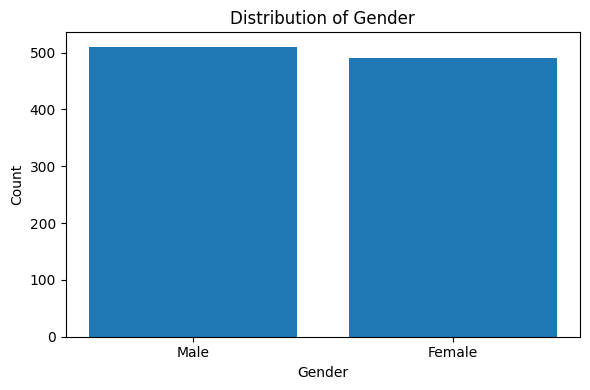

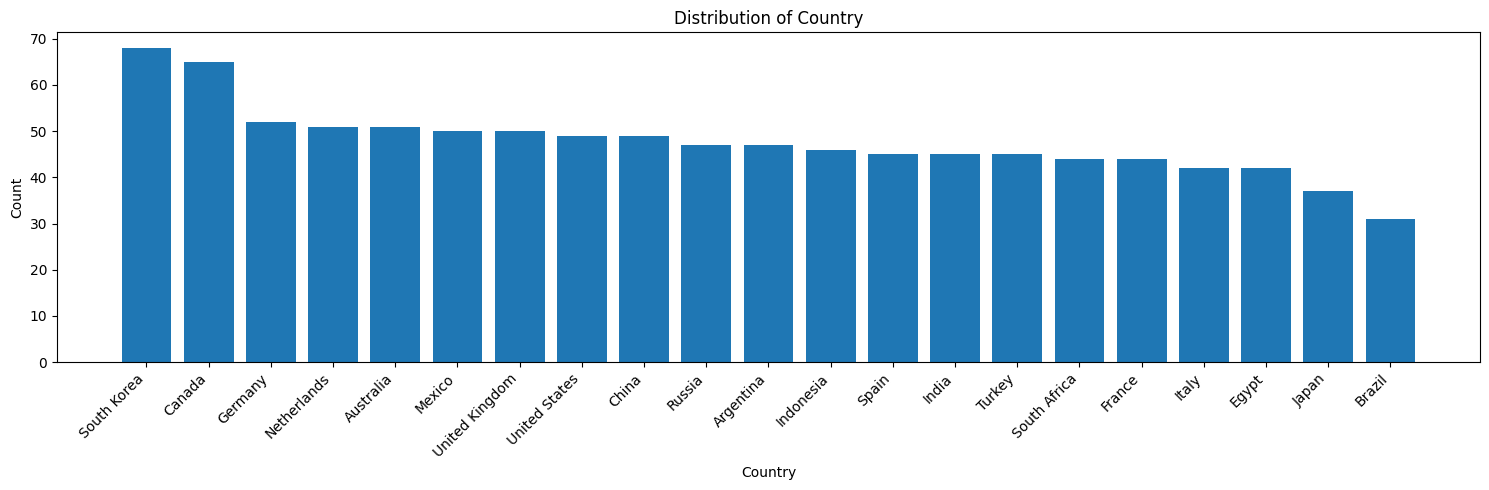

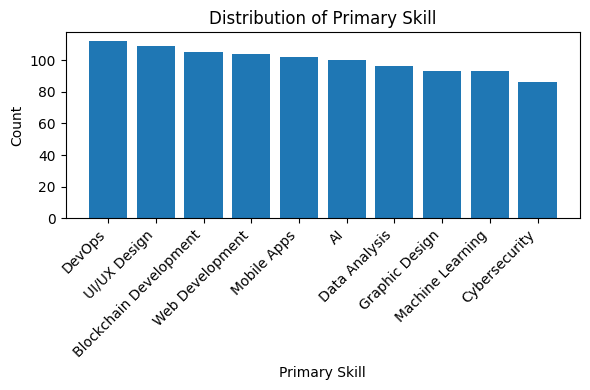

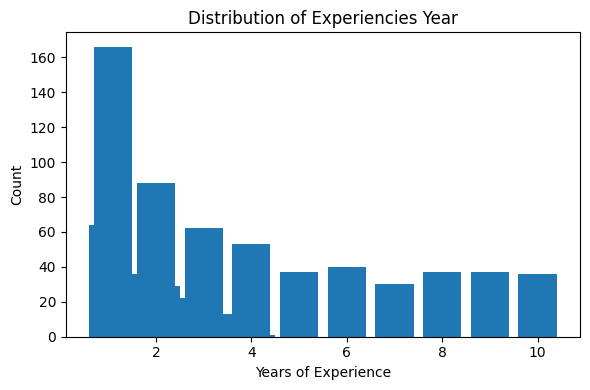

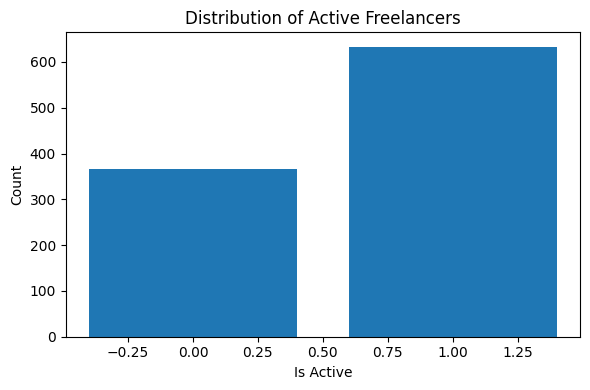

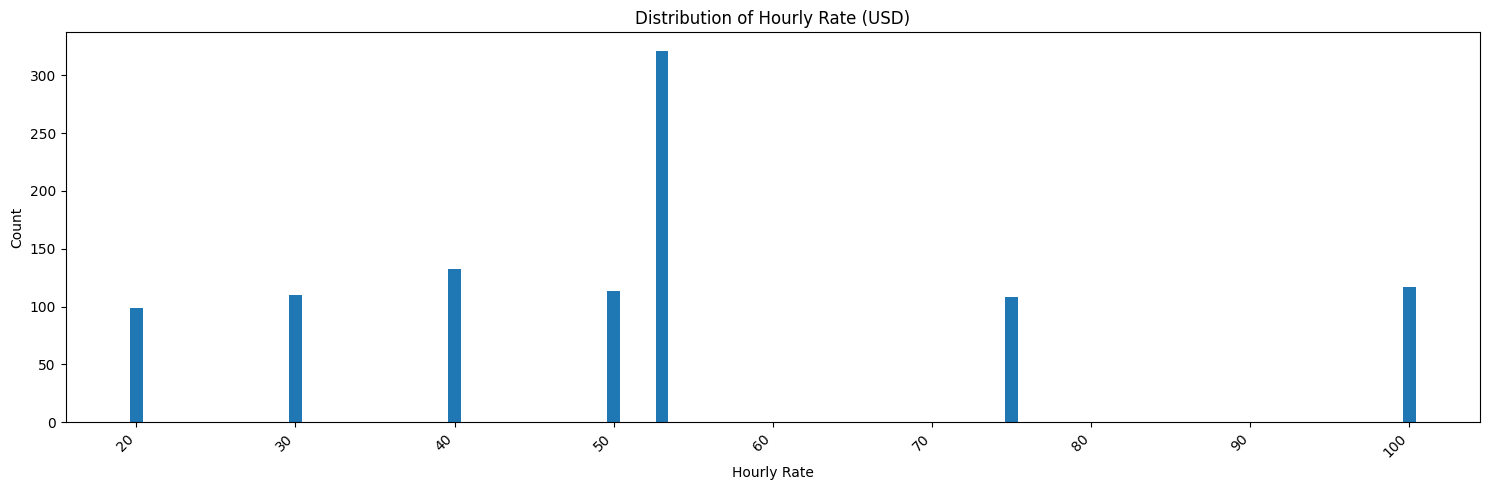

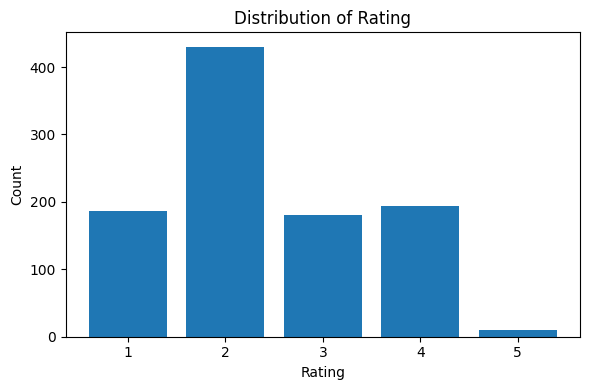

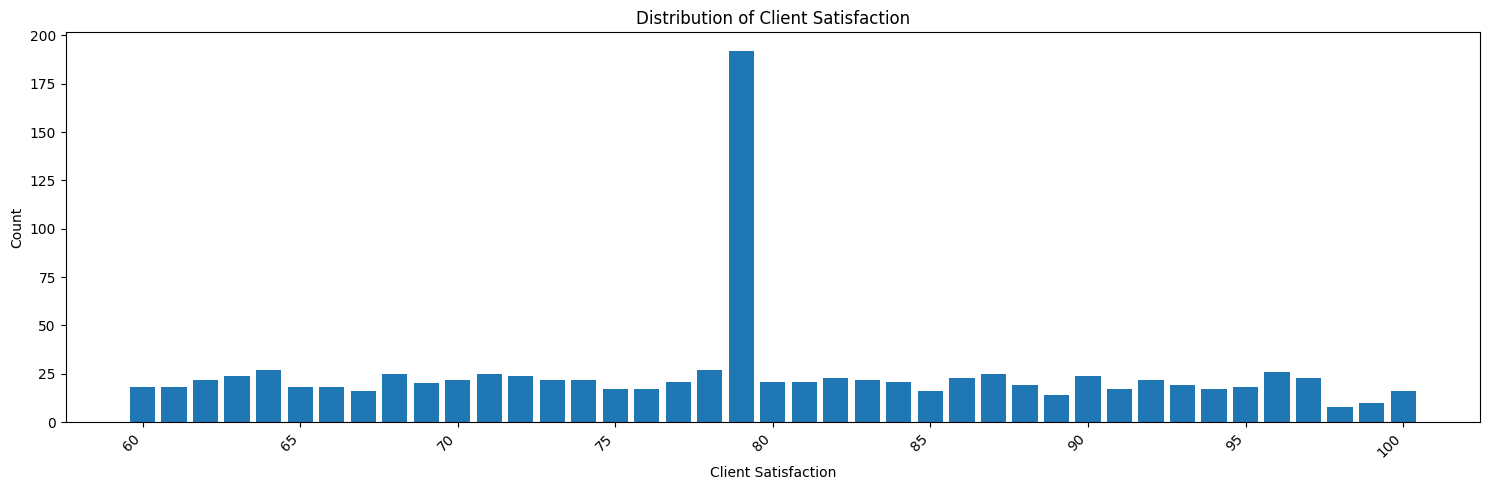

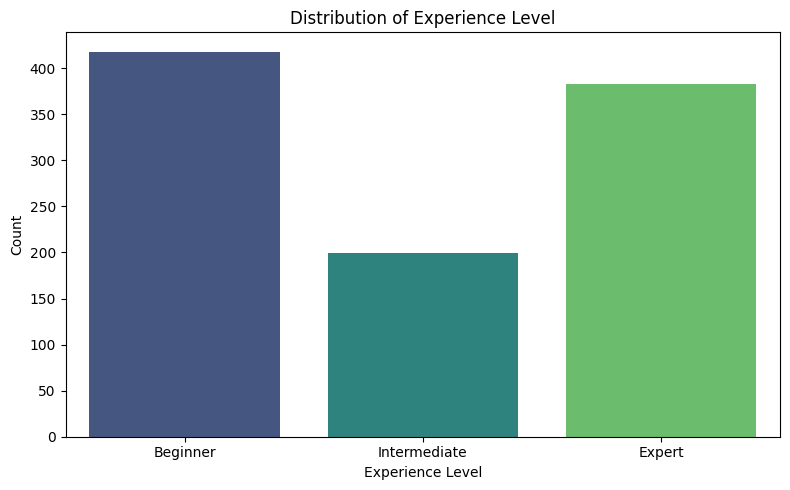

In [ ]:
#Double Check categories of the columns that looks weird after processing

#Gender
plt.figure(figsize=(6, 4))
gender_counts = df['gender'].value_counts()
plt.bar(x=gender_counts.index, height=gender_counts.values)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()

#Country
plt.figure(figsize=(15, 5))
country_counts = df['country'].value_counts()
plt.bar(x=country_counts.index, height=country_counts.values)
plt.title('Distribution of Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#Primary Skill
plt.figure(figsize=(6, 4))
primaryskill_counts = df['primary_skill'].value_counts()
plt.bar(x=primaryskill_counts.index, height=primaryskill_counts.values)
plt.title('Distribution of Primary Skill')
plt.xlabel('Primary Skill')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#Year of Experience
plt.figure(figsize=(6, 4))
years_counts = df['years_of_experience'].value_counts()
plt.bar(x=years_counts.index, height=years_counts.values) # Corrected 'years.index' to 'years_counts.index'
plt.title('Distribution of Experiencies Year')
plt.xlabel('Years of Experience')
plt.ylabel('Count')
plt.tight_layout()

#Is_active
plt.figure(figsize=(6, 4))
isactive_counts = df['is_active'].value_counts()
plt.bar(x=isactive_counts.index, height=isactive_counts.values)
plt.title('Distribution of Active Freelancers')
plt.xlabel('Is Active')
plt.ylabel('Count')
plt.tight_layout()

#Hourly Rate (USD)
plt.figure(figsize=(15, 5))
hourlyrate_counts = df['hourly_rate (USD)'].value_counts()
plt.bar(x=hourlyrate_counts.index, height=hourlyrate_counts.values)
plt.title('Distribution of Hourly Rate (USD)')
plt.xlabel('Hourly Rate')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#Rating
plt.figure(figsize=(6, 4))
rating_counts = df['rating'].value_counts()
plt.bar(x=rating_counts.index, height=rating_counts.values)
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()

#Client Satisfaction
plt.figure(figsize=(15, 5))
satisfaction_counts = df['client_satisfaction'].value_counts()
plt.bar(x=satisfaction_counts.index, height=satisfaction_counts.values)
plt.title('Distribution of Client Satisfaction')
plt.xlabel('Client Satisfaction')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#Experience Level
plt.figure(figsize=(8, 5))
sns.countplot(x='experience_level', data=df, order=['Beginner', 'Intermediate', 'Expert'], palette='viridis')
plt.title('Distribution of Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.tight_layout()

plt.show()

In [ ]:
print("Dataset After Data Cleaning and Data Manipulation")
df.head(10)

Dataset After Data Cleaning and Data Manipulation


,freelancer_ID,name,gender,age,country,language,primary_skill,years_of_experience,hourly_rate (USD),rating,is_active,client_satisfaction,experience_level
0,FL250001,Ms. Nicole Kidd,Female,52,Italy,Italian,Blockchain Development,1.1,100.000000,2,0,79,Beginner
1,FL250002,Vanessa Garcia,Female,52,Australia,English,Mobile Apps,3.4,100.000000,3,1,84,Expert
2,FL250003,Juan Nelson,Male,53,Germany,German,Graphic Design,3.1,50.000000,2,1,71,Expert
3,FL250004,Amanda Spencer,Female,38,Australia,English,Web Development,4.0,53.033873,1,1,90,Expert
4,FL250005,Lynn Curtis DDS,Female,53,Germany,German,Web Development,2.7,30.000000,4,0,83,Intermediate
5,FL250006,Lisa Johnson,Female,59,Netherlands,Dutch,AI,1.4,53.033873,2,0,79,Beginner
6,FL250007,Eric Myers,Male,52,Indonesia,Indonesian,Data Analysis,10.0,75.000000,3,0,94,Expert
7,FL250008,Ricky Graham,Male,43,Italy,Italian,Blockchain Development,1.4,40.000000,4,0,94,Beginner
8,FL250009,Sean Martin,Male,26,United States,English,Blockchain Development,4.0,53.033873,4,1,76,Expert
9,FL250010,Matthew Lloyd,Male,52,Turkey,Turkish,AI,2.2,53.033873,2,1,79,Intermediate


**EXPORT THE PROCESSED DATA**

In [ ]:
df.to_csv('processed_global_freelancers.csv', index=False)
print("Processed dataset exported to 'processed_global_freelancers.csv'")

Processed dataset exported to 'processed_global_freelancers.csv'


In [ ]:
df_done = pd.read_csv('/content/processed_global_freelancers.csv')
df.tail(5)

,freelancer_ID,name,gender,age,country,language,primary_skill,years_of_experience,hourly_rate (USD),rating,is_active,client_satisfaction,experience_level
995,FL250996,Albert Wilcox,Male,56,Turkey,Turkish,DevOps,1.3,100.000000,2,0,68,Beginner
996,FL250997,Cheryl Norris,Female,26,Germany,German,Blockchain Development,6.0,40.000000,2,0,82,Expert
997,FL250998,Kathy Watkins,Female,37,Japan,Japanese,Data Analysis,1.5,75.000000,2,0,94,Beginner
998,FL250999,John Obrien,Male,46,Russia,Russian,Machine Learning,2.2,100.000000,2,0,97,Intermediate
999,FL251000,Dawn Green,Female,36,Mexico,Spanish,UI/UX Design,1.8,53.033873,1,1,72,Beginner
